# **Image Classification-TF Malaria Dataset**

The aim of this project is to use a deep learning model to classify bloodslides as either being healthy or infected. The model used is ResNet50, which is known for high perfromance with medical images.

Content:
- Setup
- EDA
- Preprocessing
- Modelling

## **Setup**

In [ ]:
# import required libraries
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load data
# split data into train, validation and test set
(ds_train, ds_val, ds_test), info = tfds.load('malaria',split=['train[:80%]','train[80%:90%]',
                                                          'train[90%:]'],with_info=True,
                                                          as_supervised=True, shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incomplete2JLXI6/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


## **EDA**

In [ ]:
# viewing metadata
print(info)

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/tmp/tmpcqkks20btfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},


The data is loaded correctly, with a total of 27,558 images. There is equal class distribution between healthy and infected cells, so there is no risk of introducing bias to our model. The shape of the images indicates difference in sizes in the images, which will be handled during preprocessing.



In [ ]:
# investigating that split is successful
print("No. of training images is:", len(ds_train))
print("No. of validation images is:", len(ds_val))
print("No. of testing images is:", len(ds_test))


No. of training images is: 22046
No. of validation images is: 2756
No. of testing images is: 2756


In [ ]:
# investigating class distribution
num_classes = info.features['label'].num_classes
print("No. of classes is:",num_classes)


No. of classes is: 2


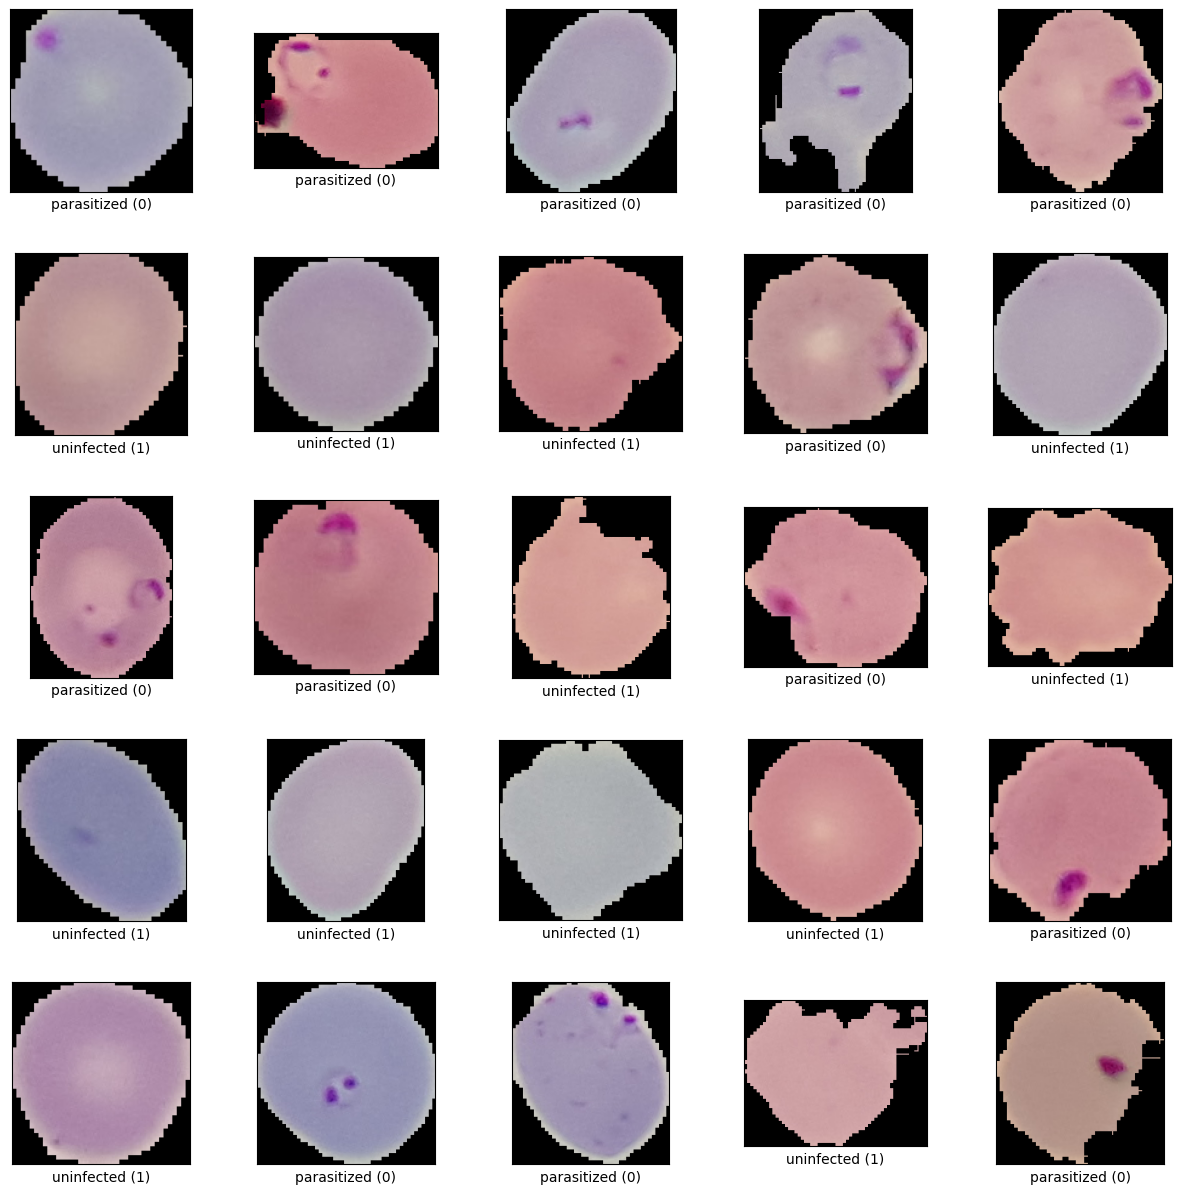

In [ ]:
#visualizing a sample of images
fig = tfds.show_examples(ds_train, info, rows=5, cols=5)

## **Preprocessing**

In [ ]:
#investigating shape of images
info.features["image"].shape

(None, None, 3)

In [ ]:
for image, label in ds_train.take(2):
    print(image.numpy().shape)
    print(image.numpy())


(103, 103, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
(106, 121, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


From the metadata, the visualisation and the array, the images are of different sizes.

In [ ]:
# Create a function to resize images
def resize_image(image, label):
    size=(64,64)
    resized_image = tf.image.resize(image, size, preserve_aspect_ratio=False)

    return resized_image, label

# Resize images
ds_train_resized = ds_train.map(resize_image)
ds_val_resized = ds_val.map(resize_image)
ds_test_resized = ds_val.map(resize_image)


In [ ]:
# investigate that resizing is successful
for image, label in ds_val_resized.take(2):
    print(image.numpy().shape)
    print(image.numpy())


(64, 64, 3)
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
(64, 64, 3)
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0.

In [ ]:
# investigating shape of label
for image, label in ds_train_resized.take(2):
    print(label)


tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
# ohe label to transform to required input shape when modelling

ds_train_resized = ds_train_resized.map(lambda x, y: (x, tf.one_hot(y, depth=2)))
ds_val_resized = ds_val_resized.map(lambda x, y: (x, tf.one_hot(y, depth=2)))
ds_test_resized = ds_test_resized.map(lambda x, y: (x, tf.one_hot(y, depth=2)))

In [ ]:
# investigate ohe is successful
for image, label in ds_train_resized.take(2):
    print(label)

tf.Tensor([1. 0.], shape=(2,), dtype=float32)
tf.Tensor([1. 0.], shape=(2,), dtype=float32)


In [ ]:
# create batches for modelling
BATCH_SIZE = 32


ds_train_batched = ds_train_resized.batch(BATCH_SIZE)
ds_val_batched = ds_val_resized.batch(BATCH_SIZE)
ds_test_batched = ds_test_resized.batch(BATCH_SIZE)

In [ ]:
# investigating correct shape before modelling
for image, label in ds_train_batched.take(1):
    print("Image shape:", image.shape)
    print("Label shape:", label.shape)


Image shape: (32, 64, 64, 3)
Label shape: (32, 2)


## **Modelling**

In [ ]:
# initialize model
model=Sequential()


resnet_model = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=(64,64,3),
    pooling="max",
    classes=2,
    classifier_activation="softmax",
)

for layer in resnet_model.layers:
    layer.trainable = False


# add pretrained model
model.add(resnet_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='sigmoid'))


# Compile model
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])


94668760/94668760 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24614914 (93.90 MB)
Trainable params: 1050114 (4.01 MB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
history = model.fit(ds_train_batched,
                    validation_data = ds_val_batched,
                    epochs=10)

Epoch 1/10
689/689 [==============================] - 55s 62ms/step - loss: 8.9450 - accuracy: 0.6953 - val_loss: 3.1328 - val_accuracy: 0.6698
Epoch 2/10
689/689 [==============================] - 23s 33ms/step - loss: 2.1591 - accuracy: 0.7325 - val_loss: 0.9152 - val_accuracy: 0.7631
Epoch 3/10
689/689 [==============================] - 19s 28ms/step - loss: 0.8426 - accuracy: 0.7539 - val_loss: 0.5734 - val_accuracy: 0.7729
Epoch 4/10
689/689 [==============================] - 21s 31ms/step - loss: 0.5958 - accuracy: 0.7613 - val_loss: 0.6116 - val_accuracy: 0.7108
Epoch 5/10
689/689 [==============================] - 19s 28ms/step - loss: 0.5071 - accuracy: 0.7713 - val_loss: 0.5083 - val_accuracy: 0.7663
Epoch 6/10
689/689 [==============================] - 23s 33ms/step - loss: 0.4712 - accuracy: 0.7805 - val_loss: 0.5057 - val_accuracy: 0.7631
Epoch 7/10
689/689 [==============================] - 22s 32ms/step - loss: 0.4597 - accuracy: 0.7830 - val_loss: 0.4789 - val_accuracy:

In [ ]:
model.save('malaria_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# evaluate model
loss, accuracy = model.evaluate(ds_test_batched)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

87/87 [==============================] - 4s 46ms/step - loss: 0.4702 - accuracy: 0.7841
Test loss: 0.47015517950057983
Test accuracy: 0.7841073870658875


Test accuracy of 77% shows that the model will generalize fairly well to unseen data.However, a loss of 0.47 is quite high, showing the model is not doing well in predicting whether an image is healthy or infected.

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('malaria_classification_model.h5')

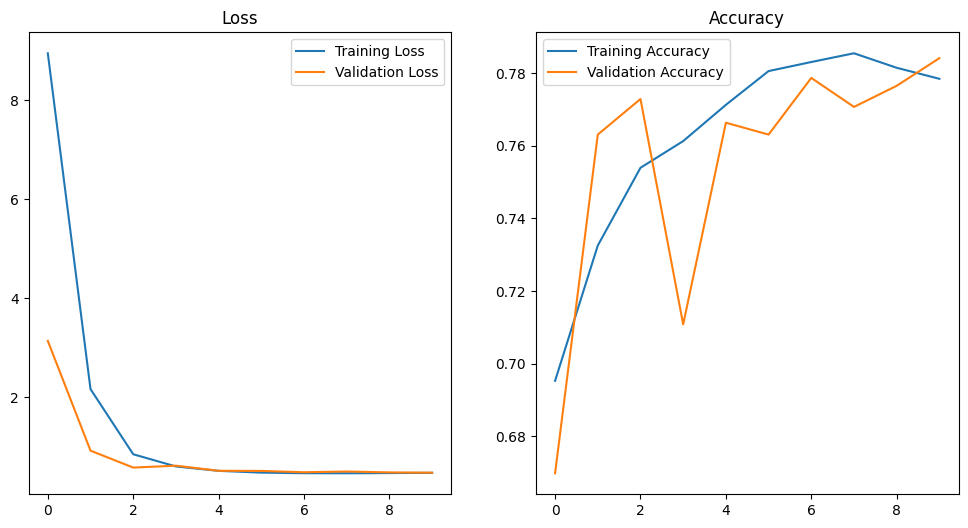

In [ ]:
# visualize model performance
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# training and val loss
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss')
axs[0].legend()

# train and val accuracy
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy')
axs[1].legend()

plt.show()


From the graph, both training and validation loss decrease as number of epochs increase, meaning the model is capturing the patterns well and generalizing well to unseen data.

The training accuracy steadily increases while the validation accuracy is fluctuating. However, though there is a gap between the two, it is not significant.

The test accuracy and training and validation accuracy indicate slight overfitting.

## **Model Tuning**

I will try to improve model perfromance by augmenting the training data. Introducing small variations in the training data may lessen the likelihood of the model learning patterns from the data too well. I also unfreeze some of the last layers of the model.

In [ ]:
# load a new set of training images
(ds_train2,_,_), info = tfds.load('malaria',split=['train[:80%]','train[80%:90%]',
                                                          'train[90%:]'],with_info=True,
                                                          as_supervised=True, shuffle_files=True)

In [ ]:
# preprocess news set of training images
ds_train2_resized = ds_train2.map(resize_image)
ds_train2_resized = ds_train2_resized.map(lambda x, y: (x, tf.one_hot(y, depth=2)))
ds_train2_batched = ds_train2_resized.batch(BATCH_SIZE)

In [ ]:
# create function to augment new set of training images
def augment_data(image, label):
    augmented_image = tf.image.random_flip_left_right(image)
    augmented_image = tf.image.random_flip_up_down(augmented_image)

    return augmented_image, label

ds_train2 = ds_train2.map(augment_data)


In [ ]:
# initialize model
model=Sequential()

resnet_model = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=(64,64,3),
    pooling="max",
    classes=2,
    classifier_activation="softmax",
)

# unfreeze layers
for layer in model.layers[2:]:
    layer.trainable = True


# add pretrained model
model.add(resnet_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='sigmoid'))


# Compile model
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24614914 (93.90 MB)
Trainable params: 24569474 (93.73 MB)
Non-trainable params: 45440 (177.50 KB)
_________________________________________________________________


In [ ]:
history = model.fit(ds_train2_batched,
                    validation_data = ds_val_batched,
                    epochs=10)

Epoch 1/10
689/689 [==============================] - 75s 66ms/step - loss: 0.2173 - accuracy: 0.9315 - val_loss: 0.1766 - val_accuracy: 0.9532
Epoch 2/10
689/689 [==============================] - 43s 62ms/step - loss: 0.1274 - accuracy: 0.9571 - val_loss: 0.2255 - val_accuracy: 0.9187
Epoch 3/10
689/689 [==============================] - 44s 64ms/step - loss: 0.1153 - accuracy: 0.9599 - val_loss: 0.1648 - val_accuracy: 0.9448
Epoch 4/10
689/689 [==============================] - 44s 63ms/step - loss: 0.1152 - accuracy: 0.9609 - val_loss: 0.1674 - val_accuracy: 0.9488
Epoch 5/10
689/689 [==============================] - 46s 67ms/step - loss: 0.1042 - accuracy: 0.9642 - val_loss: 0.2379 - val_accuracy: 0.9216
Epoch 6/10
689/689 [==============================] - 43s 62ms/step - loss: 0.1009 - accuracy: 0.9658 - val_loss: 0.3844 - val_accuracy: 0.9387
Epoch 7/10
689/689 [==============================] - 45s 65ms/step - loss: 0.1073 - accuracy: 0.9628 - val_loss: 0.3932 - val_accuracy:

In [ ]:
model.save('malaria_classification_model_tuned.h5')

In [ ]:
loss, accuracy = model.evaluate(ds_test_batched)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

87/87 [==============================] - 4s 44ms/step - loss: 0.1561 - accuracy: 0.9554
Test loss: 0.15607571601867676
Test accuracy: 0.9553701281547546


The test loss has improved from 0.47 to 0.15. The test accuracy has also imroved from 0.78 to 0.95.

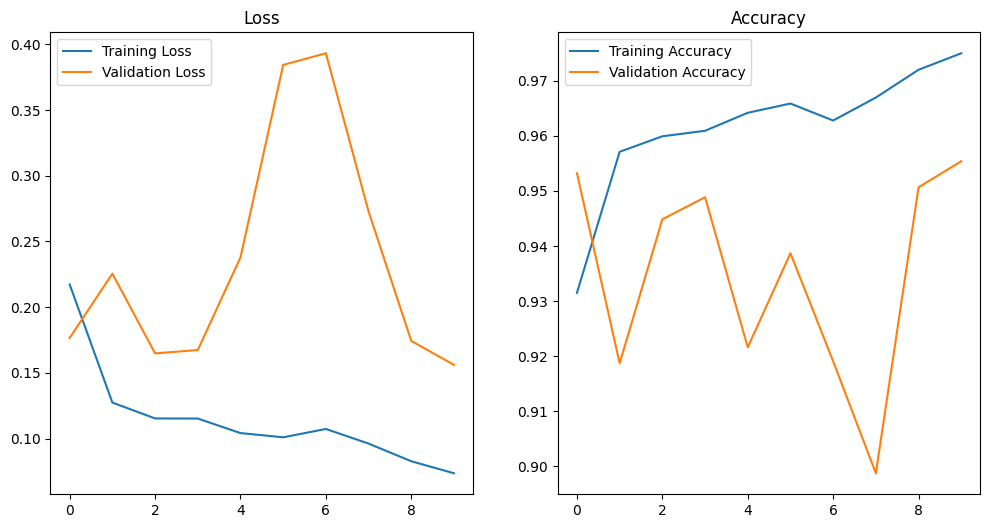

In [ ]:
# visualize model performance
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# train and val loss
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss')
axs[0].legend()

# train and val accuracy
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy')
axs[1].legend()

Although test loss has reduced, and test accuracy has increased, the tuned model has more overfitting than the first model. The gap between validation loss and training loss is significant, meaning the model is complex enough to memorize even more patterns in the data. Training accuracy is steadily rising but the validation accuracy is erratic. This means the tuned model will not perfrom well when giving predictions

## **Conclusion**

The initial ResNet50 model perfroms better than the tuned ResNet50 model.It has a test loss of .47 and a test accuracy of .78.

The second model is a tuned version of the first, done by introducing data augmentation to the training data and unfreezing some layers. However, this leads to more overfitting.

Additional steps could include:
- Experimenting with the layers being frozen and the order of the layers being frozen

- Experimenting with different deep models.

- Using heavier data augmentation